# Classifying Breast Cancer Molecular Subtype using Gene Expression Data


**This exercise applies multi-class classification to predict the molecular subtype of breast cancer using gene expression data for 173 mutation driver genes**

This exercise uses three different Machine Learning methods:
<ol>
<li>LASSO Regression</li>
<li>Random Forest Classifier</li>
<li>XGBoost Classifier</li>
</ol>

**The exercise has been split into the following parts:**

***Part 1***: Set up, Data Pre-Processing and Exploratory Data Analysis
- Loading the data and libraries
- Reviewing and understanding the data set

***Part 2***: LASSO Regression
- Build a LASSO regression model
- Understand the purpose of the penalty parameter ($\alpha$) and how to optimise it using cross-validation

***Part 3***: Random Forest Classification
- Build a Random Forest Classifier
- Learn to tune hyper-parameters for this model using cross-validation
- Evaluate model performance
- Identify the most important features

***Part 4***: XGBoost Classification
- Build an XGBoost Classifier
- Learn to tune hyper-parameters for this model using cross-validation
- Evaluate model performance
- Identify the most important features

### Exercise Requirements
Listed below are the packages required for this exercise. Please ensure that you have them installed to complete this exercise.
- numpy
- matplotlib
- pandas
- sklearn
- xgboost
- eli5

## Part 1: Set up, Data Pre-Processing and Exploratory Data Analysis

**Exercise 1.1** Load the libraries to be used - numpy, matplolib, pandas and sklearn

In [5]:
#1.1 Load the required libraries


Below we have provided the code to import the libraries; you may have come across these packages in earlier exercises, but if you're unfamiliar, see below.

```
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
```

**Exercise 1.2** Load the gene expression data, save it as a variable `gene_exp` and output the first
             10 rows  
             (This name of the file is "MTBC_Breast_Cancer.csv")

<span style='color:red'>**JC EDIT** Add the source for the data - it's good practice to acknowledge where it came from and what the data represents</span>

In [ ]:
#Try the exercise

See below if you didn't manage to load the gene expression data. We use the `read_csv` method and `head` method to load the data and show a specific number of rows of data. If you're working in colab be sure to have dropped the data into the correct folder.

```
#1.2 Load the data and output the first 10 rows
gene_exp = pd.read_csv("MTBC_Breast_Cancer.csv")

#view first 10 rows of data
gene_exp.head(10)
```

**Exercise 1.3** Look at the data dimensions and data types

Below we use the `info` method to obtain information about the dimensions and datatypes of the dataframe.

In [10]:
gene_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Columns: 178 entries, Sample Identifier to ZFP36L1
dtypes: float64(173), object(5)
memory usage: 2.7+ MB


**Q1.** How many rows and columns of data are there? What types of data are contained within this dataset? Try below in the code block.

<details>
  <summary>Answer</summary>
  
  - The range index shows there are 1980 rows

  - There columns line shows there are 178 columns
  
  - 173 columns contain float64 values, and 5 objects
</details>

In [5]:
#alternatively we can see the data set dimensions using df.shape
gene_exp.shape

(1980, 178)

In [17]:
#df.dtype let's us see the data type for each column
gene_exp.dtypes

Sample Identifier               object
ER Status                       object
HER2 Status                     object
PR Status                       object
Pam50 + Claudin-low subtype     object
                                ...   
USH2A                          float64
USP28                          float64
USP9X                          float64
UTRN                           float64
ZFP36L1                        float64
Length: 178, dtype: object

**Exercise 1.4** Check for any missing data in the code block below.

Below we use the `isna()` function dataframe of the same shape as `gene_exp` but boolean values depending on if any of the values are `NaN`. 

Invoking the `any()` method returns a 1D array with boolean values if any value in the columns has a `NaN` value. 

Invoking the `any()` method again returns a single boolean value if there is at least one `Nan` value across the whole dataset.

In [11]:
#Check for any missing values 
gene_exp.isna().any().any()

False

**Exercise 1.5** 

Some variable names and data types are not in the best format for analysis. Therefore we will change them.

i. Rename the outcome variable from "Pam50 + Claudin-low subtype" to "Cancer_Subtype"

_Spaces in variable names can challenge when calling these variables later_

We use the `rename` pandas function to rename `Pam50 + Claudin-low subtype` to `Cancer_Subtype`. We specify `inplace=True` because we want to ensure that we modify the `gene_exp` dataset.

In [18]:
#Rename the y variable column
gene_exp.rename(columns = {'Pam50 + Claudin-low subtype':'Cancer_Subtype'}, inplace=True)

ii. Convert the outcome variable to a categorical data type

We use the `astype` pandas function to convert a specific column's datatypes to `category`, which means that it represents `categorical` data only. 

In [19]:
#Converting the cancer subtype variable to categorical
gene_exp['Cancer_Subtype'] = gene_exp['Cancer_Subtype'].astype('category')

iii. Replace the "claudin-low" subtype with "claudinlow" removing the '-' symbol

To change the names of the categories within the `Cancer_Subtype` column, we can use the `cat` accessory, which allows for specific methods to be applied to categorical data. We use a particular method, `rename_categories,` and pass in an object with the name of the categorical data we want to change and the new value we wish it to be.

In [20]:
#Replace the claudin-low subtype to compatible formating
gene_exp['Cancer_Subtype'] = gene_exp['Cancer_Subtype'].cat.rename_categories({'claudin-low':'claudinlow'})

iv. Output the different labels for the cancer subtype category

We can use the `unique()` method to return an array of the unique labels for the cancer subtype category now we've modified one of the labels.

In [22]:
#show unique Cancer_Subtype categories in dataset
gene_exp['Cancer_Subtype'].unique()

['claudinlow', 'LumA', 'LumB', 'Normal', 'Her2', 'Basal', 'NC']
Categories (7, object): ['Basal', 'Her2', 'LumA', 'LumB', 'NC', 'Normal', 'claudinlow']

### Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** is an essential step in the machine learning pipeline. It enables us to understand the dataset's characteristics and provide summaries of what the dataset represents. EDA is necessary to understand the generalisability of the models created for other datasets.

EDA encompasses many methods, such as exploring variable distribution and relationships between different variables in the dataset.

**Exercise 1.5** Create a pivot table showing ER/HER2/PR status by Cancer Subtype using pandas

_ER = Estrogen Receptor, HER2 = Human Epidermal Growth Factor Receptor 2, PR = Progesterone Receptor_

_These receptors are three very commonly assessed genetic markers for Breast Cancer and are essential in prognostication_

Suppose you have not come across a pivot table in pandas, then it's worth looking at the documentation on how to do this. A pivot table is a summarisation tool to reorganize data in order to have structured summaries of large datasets. 

The `pivot_table` method in pandas takes different arguments in order to structure it the way you want. 

In [23]:
pd.pivot_table(gene_exp, 
               values="Sample Identifier", #Identifies unique samples
               index=["ER Status", "HER2 Status", "PR Status"], #ER, HER2, and PR
               columns=["Cancer_Subtype"], #splits receptor status by cancer subtypes
               aggfunc='count', #gets the count of each type
               fill_value=0) #if none, fills cell with 0

Cancer_Subtype                   Basal  Her2  LumA  LumB  NC  Normal  \
ER Status HER2 Status PR Status                                        
Negative  Negative    Negative     157    30     3     0   0      11   
                      Positive       3     2     0     0   0       4   
          Positive    Negative      18    94     1     0   0       8   
                      Positive       2     3     0     0   0       0   
Positive  Negative    Negative      14    34   146   150   2      35   
                      Positive      13    30   530   280   4      84   
          Positive    Negative       2    16    11    26   0       4   
                      Positive       0    15     9    19   0       2   

Cancer_Subtype                   claudinlow  
ER Status HER2 Status PR Status              
Negative  Negative    Negative          119  
                      Positive            6  
          Positive    Negative           13  
                      Positive            0  
Positive  Negative    Negative           44  
                      Positive           32  
          Positive    Negative            2  
                      Positive            2

In order to specify the receptor types, we use the `index` parameter passing in a list of values. Notice how the index has been split into negative and positive for each receptor value. 

We specify the cancer subtypes that we wish to split out the different gene types by passing a column we wish to split out, in this case, `Cancer_Subtype`. 

We can also get display a count for each cancer subtype by specifying `count` in the `aggfunc` parameter, which will count up each cancer subtype. 

Lastly it's also possible to specify what to fill the pivot table if there are no values by passing in 0 as an argument to the `fill_value` keyword.

**Exercise 1.6** Plot a pie chart illustrating the percentage of each Cancer Subtype
                
<span style='color:red'>_Hint: use the groupby function to aggregate the data_</span>

To create a pie chart of types of breast cancer. First, we want to split the cancer subtype into smaller subsets. We use the `groupby` method to do this for the `Cancer_Subtype` column. We then return a 1D array of the counts of each Cancer_Subtype by invoking the `count()` method. 

We can then plot that on a pie chart using the `plot` method on this 1D array. We specify the `kind` parameter as `pie` and specify the title. The y parameter of the plot specifies where we get the different parts of the piechart to plot.

By specifying `%1.0f%%` for the `autopct` parameter, we are using a format specifier. We are asking Python to display the labels as percentages. The `%` denotes the value should be a percentage. `1.0` represents that the values should display one digit before the decimal point and no digits after the decimal point. `f` specifies that the number should be a float point number. `%` represents a percent symbol, but we have to add an extra `%` as `%` ends the format specifier. 

For example, the value `0.753` applies the format `%1.0f%%` and would return `75%`.

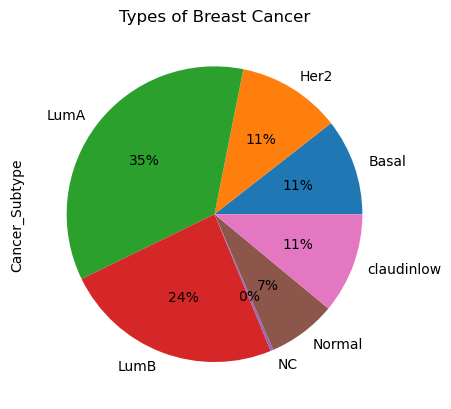

In [29]:
#Pie chart of cancer subtype cases
y_count = gene_exp.groupby(["Cancer_Subtype"])["Cancer_Subtype"].count()

y_count.plot(kind='pie', y="Cancer_Subtype", autopct='%1.0f%%', title='Types of Breast Cancer')
plt.show()

**Exercise 1.7** Explore the correlation between the rest of the gene expression predictors by constructing a correlation plot

We can use the `drop()` method and pass a list of columns we want to drop. By specifying axis=1 we are specifying that columns should be dropped. We use the `astype` to convert the dataset to floating point values.

In order to create a correlation plot, we can use the `corr()` method, which calculates the correlations one variable at a time against each other variable.

We can then use matplotlib to plot this as a matrix heatmap by passing the correlation calculations in `gene_corr` to the `matshow` method. 

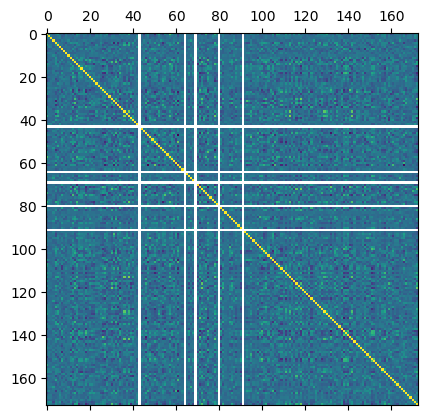

In [45]:
#Drop the sample id (Sample Identifier) outcome (Cancer_Subtype),
#and binary variables (ER Status, HER2 Status, PR Status)
gene_predictors = gene_exp.drop(['Cancer_Subtype','ER Status',
                                 'HER2 Status','PR Status',
                                 'Sample Identifier'],axis=1).astype('float64')

#Calculate the correlation between different genes
gene_corr = gene_predictors.corr()

#Plot the correlations as a matrix heatmap using pyplot
plt.matshow(gene_corr)

plt.show()

## Part 2: LASSO regression

Lasso regression is similar to ordinary linear regression, except it employs a penalisation term, alpha, to reduce the complexity of the model to avoid overfitting. The advantage of using lasso is that it can identify which variables are most important in predicting the outcome and help construct a simpler model.

### **Step 1:** Prepare and separate the dataset into predictors and outcome.

**Exercise 2.1** Create a separate variable `y` for the the columns of possible outcomes we want our model to predict. 

In [46]:
#Create a variable containing outcome only
y=gene_exp['Cancer_Subtype']

**Exercise 2.2** Convert the outcome subtypes into dummy variables

_Dummy variables convert a single categorical variable into multiple binary variables, each representing presence (1) or absence (0) of a given variable subtype._

The `get_dummies` method will take a set of categorical data and return either the presence or absence by 1 and 0 for a given cancer subtype. We call this one hot encoding. The reason for this is that the models can't analyse categorical data, so we convert it into 1's and 0'.

In [48]:
#Create dummy variables for y
y = pd.get_dummies(y)

#visualise what dummy variables look like by reviewing the top rows of the new dataset
y.head()

,Basal,Her2,LumA,LumB,NC,Normal,claudinlow
0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


**Exercise 2.3** Convert ER/HER2/PR Status variables into Binary (0/1) variables

To one hot encode the receptor variables, we use the `map` method to convert `Positive` and `Negative` into `1` and `0`, respectively. The map method can take a dictionary as an argument and return a modified data frame. 

We specify another dictionary for each receptor status variable and create a new data frame.

In [79]:
#create a dictionary which labels 'Positive' and 'Negative' to 1 and 0, respectively
status_dict = {'Positive':1,
               'Negative':0}

#map the dictionary to each of the receptor status variables into a new dictionary
binary_dict = {
    'ER_Status':gene_exp['ER Status'].map(status_dict),
    'HER2_Status':gene_exp['HER2 Status'].map(status_dict),
    'PR_Status':gene_exp['PR Status'].map(status_dict)
}

#create a dataframe and view the top rows
X_bin = pd.DataFrame(binary_dict)
X_bin.head()

,ER_Status,HER2_Status,PR_Status
0,1,0,0
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1


**Exercise 2.4** Merge these new binary variables with the remaining gene predictors

_Recall that we made a `gene_predictors` dataframe above to plot the correlation between variables, so we can concatenate this with our binary dataframe to get all the features together._

We can use the `contact` method to merge two data frames. Here we want to merge the one hot encoded receptor status data frame with the data frame `gene_predictors` in the previous part.

In [85]:
#use pandas pd.concat to join the dataframes
X = pd.concat([X_bin,gene_predictors], #dataframes to be joined
              axis=1) #axis states we join as columns (axis=0 would be rows)

#review the data
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Columns: 176 entries, ER_Status to ZFP36L1
dtypes: float64(173), int64(3)
memory usage: 2.7 MB


### **Step 2:** Split the dataset into training and test data using a 70:30 divide.

Splitting data into training and testing portions is called the **'hold-out** method and allows us to test the performance of our model on data it has not been trained on later. The hold-out method is an essential step as a model's performance is often different on testing data compared with the data used to train it.

**Exercise 2.6** Use the `train_test_split` function from sklearn to split the predictors and outcome into a 70:30 training/test data split. Look at the sklearn docs if you're unsure.

Print the data for the predictors and outcome variables in the training data set.

The `train_test_split` method allows us split our date up randomly. We pass in the data we wish to use, in this case `X` and `y` which corresponds to the modified dataset with one hot encoding and the outcome dataframe we created.

The `test_size` parameter allows us to specify a value between 0 and 1 we want to split the data by.

 By specifying `random_state` with a number we make the random nature of the split consistent, that is if we were to split data again by using the same integer argument we would get the same random split.

In [88]:
#Split data into train and test using a 70:30 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, #the data we created
                                                    test_size=0.3, #defines split
                                                    random_state=10) #split the same way each time the script is run for reproducibility

#print the top of X variable the data
X_train.head()

,ER_Status,HER2_Status,PR_Status,ACVRL1,AFF2,AGMO,AGTR2,AHNAK,AHNAK2,AKAP9,...,THADA,THSD7A,TP53,TTYH1,UBR5,USH2A,USP28,USP9X,UTRN,ZFP36L1
39,1,0,0,1.1034,0.1656,1.4628,0.0661,-1.9062,-1.8053,0.7638,...,-2.4783,0.0485,-0.6367,-0.2860,0.3071,1.0995,1.3747,-0.8521,-0.9502,1.3671
1243,1,0,1,1.2069,-0.0494,0.5609,-0.6411,0.9271,0.8690,-0.2180,...,0.5977,-1.1100,0.6825,0.9661,-1.2599,-0.2068,-0.1707,0.0030,-0.1395,-1.4589
1649,1,0,1,-0.6813,-0.8010,1.5956,0.9321,1.3232,-0.0967,-1.5754,...,-1.6129,-0.3615,0.3875,-0.5985,0.3358,-0.4211,-1.5854,-0.8578,-0.6875,0.2591
1894,1,0,0,1.2270,-0.4161,-0.2972,1.3631,-0.6971,-0.9343,1.5675,...,0.3157,0.7786,0.9018,-0.6015,-0.5705,0.1310,-1.4310,0.4742,0.4088,-2.4925
1540,1,0,1,-1.5055,0.2014,0.3537,0.1039,-0.5490,-0.3912,0.4890,...,-1.8845,2.2835,1.2625,-0.6453,-0.1281,-0.6180,-0.6081,-0.8487,-1.3041,1.6771


In [87]:
#print the top of the outcome data
y_train.head()

,Basal,Her2,LumA,LumB,NC,Normal,claudinlow
39,0,0,0,0,0,0,1
1243,0,0,0,0,0,1,0
1649,0,0,0,1,0,0,0
1894,0,0,0,1,0,0,0
1540,0,0,0,1,0,0,0


### **Step 3.** Using k-fold Cross Validation to find the best alpha (the penalty term in Lasso regression)

K-fold cross-validation splits the training data into 'k' random datasets of equal size. The model is then trained on k-1 datasets, and the final set is used for validation to find the model with the slightest error. This process is repeated k times, with each fold used as the validation set once. The final model then averages the best-performing models of each fold.

In LASSO, the model tries to find (1) the best coefficient weights for each feature and (2) the best value of alpha ($\alpha$).

Recall that LASSO takes simple linear (or logistic) regression modeling but applies a penalty that reduces the number of features selected in the final model.

This is termed _'automated feature selection'_. The penalty $\alpha$ is multiplied by the absolute value of each coefficient weight from the minimised loss function and substracted. Consequently, variables with small coefficient weights become zero, eliminating them from the final model.

**Exercise 2.7** Use `MultiTaskLassoCV` to fit a lasso model using ten fold cross validation and `random_state = 10`. If you're stuck on this, try look up MultiTaskLassoCV in the sklearn docs.

**Exercise 2.8** Output the best alpha parameter found via cross-validation

In [91]:
#Building the lasso model with cross validation to find optimal alpha
from sklearn.linear_model import MultiTaskLassoCV 

#Fitting Lasso with 10 fold cross validation to find the best alpha
cv_lasso = MultiTaskLassoCV(cv=10, #number of k folds
                            random_state=10, #for reproducibility
                            max_iter=10000) #max no of times model will run to find best values

#fit model with training data
cv_lasso_model = cv_lasso.fit(X_train, y_train)

#Print out the best alpha
print('Best Alpha: ',cv_lasso_model.alpha_)

Best Alpha:  0.010749186140051133


We use the `MultiTaskLassoCV` to do cross-validation. The `cv` parameter determines how many k folds we wish to make, i.e., how many times we want to split the dataset. The `max_iter` parameter allows us to set the maximum number of times a model will run to find the best values. 

We then use the `fit` method to fit the model to our training data.

### **Step 4.** Use the best alpha to fit a new LASSO regression model on training data

**Exercise 2.9** Using `MultiTaskLasso` initialise a new model with the best alpha penalisation parameter found via cross-validation

**Exercise 2.10** Fit this model onto the training data

In [96]:
#Creating the final lasso model incorporating best alpha from cv
from sklearn.linear_model import MultiTaskLasso

#define model with best alpha paramter
lasso_a = MultiTaskLasso(alpha = cv_lasso.alpha_, #this is our alpha from above
                         random_state=10) #for reproducibility

#fit model to training data
lasso_a.fit(X_train, y_train)

MultiTaskLasso(alpha=0.010749186140051133, random_state=10)

With the `MultiTaskLasso`, we can specify the parameter `alpha` we found by doing cross-validation, then we can then fit the model to our training data as before.

**Q.** What will the co-efficients be for the features included in the final LASSO model?

<details>
    <summary>Answer</summary>
    <ul>
    <li>All features included in the final model will have non-zero coefficients
    <li>Features with very small coefficients will become 0
    <li>These features will be discarded
    </ul>
</details>

### **Step 5:** Identify the most important features (predictors) 

The code below outputs a list of the features used in the final model. The next chunk uses the ELI5 package to visualise the most important features.

ELI5 prints the coefficient weights for each feature. In order to use this package, you will need to install it on your system first. To do this, open your terminal and type:

```pip install eli5```

If you're having difficulty with this - see the package overview [here](https://eli5.readthedocs.io/en/latest/overview.html).



In [97]:
#Identify the most important features used in the lasso model
from sklearn.feature_selection import SelectFromModel

#Create a meta-transformer for selecting features based on importance weights
model = SelectFromModel(lasso_a, prefit=True)

#Outputting the most important features with nonzero coefficients
feature_idx = model.get_support() #Boolean list if weights are non-zero (True if non-zero)
selected_features = X_train.columns[feature_idx] #filter only non-zero  features
print(selected_features) #print features

#get number of included features
print(len(selected_features))
#145 variables were used in the final model

Index(['ER_Status', 'PR_Status', 'ACVRL1', 'AFF2', 'AGMO', 'AGTR2', 'AHNAK',
       'AHNAK2', 'AKAP9', 'AKT1',
       ...
       'TBL1XR1', 'TBX3', 'THADA', 'TP53', 'TTYH1', 'UBR5', 'USH2A', 'USP28',
       'USP9X', 'ZFP36L1'],
      dtype='object', length=145)
145


We use the `SelectFromModel` method to select the feature based on the importance of the weights from the model we created. By setting `prefit` to `True`, we are specifying we have already pre-trained the model using Lasso regularisation, which allows us to use the pre-computed coefficients without retraining the model.

The `get_support` method returns a boolean list that indicates which features have non-zero coefficients. Then we filter the training data to only include those non-zero features. 





In [95]:
#Use the ELI5 library to visualise the most important features for each cancer subtype
import eli5  #[pip install eli5] in terminal if not installed already

#show coefficient weights
eli5.show_weights(lasso_a, top=-1, feature_names = X_train.columns.tolist())

2023-06-08 11:13:10.915261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Q.** What do you think "< BIAS >"  means?

<details>
    <summary>Answer</summary>
    This is the intercept value of the model, or alternatively, the expected average score outputted by the model, based on the distribution of the training set.
    
</details>

### **Step 6. Evaluating model performance**

For regression models, performance can be assessed by R-squared and Mean Squared Error. 

Click [here](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error) to see how these metrics are calculated and other regression metrics available. 

**Exercise 2.11** Use `r2_score` and `mean_squared_error` from sklearn.metrics to evaluation the model fitted both to the training and test data set

In [ ]:
# R2 Score

In [ ]:
#Mean Squared Error

To use `r2_score` and `mean_squared_error` methods on our data sets, we need to have some predictions based on our training and test data. We can return the predicted values by using the `predict` method on our lasso model specifying our training dataset. The `r2_score` and `mean_squared_error` methods can be used by passing in our actual outcomes from the training and test data set and comparing them against our predicted values.

In [36]:
#Model evaluation 
from sklearn.metrics import r2_score

#Calculate R-squared for prediction using training data
r2_train = r2_score(y_train, lasso_a.predict(X_train))
print("R squared training data:", round(r2_train*100, 2))

#Calculate R-squared for prediction using testing data
r2_test = r2_score(y_test, lasso_a.predict(X_test))
print("R squared test data:", round(r2_test*100, 2))

R squared training data: 40.79
R squared test data: 35.04


In [98]:
#Mean squared error
from sklearn.metrics import mean_squared_error

#Calculate MSE for prediction using training data
mse_train = mean_squared_error(y_train, lasso_a.predict(X_train))
print('Mean Squared Error of the training data:', round(mse_train, 3))

#Calculate MSE for prediction using testing data
mse_test = mean_squared_error(y_test, lasso_a.predict(X_test))
print('Mean Squared Error of the test data:', round(mse_test, 3))

Mean Squared Error of the training data: 0.059
Mean Squared Error of the test data: 0.064


**Q.** What do you notice about the outputs for training compared with testing data? Is this to be expected?

<details>
    <summary>Answer</summary>
    The performance is worse for the testing data. This is to be expected as the model was not trained on this data, and so predictions on this data have no prior knowledge.
    
</details>

### **Optional Step:** Visualising cross validation of alpha

The cross validation approach to find the best term for alpha can be visualised in the graph below. We can see the mean square error averaged over different cv folds for different values of alpha used, with the best alpha value resulting in the least mean square error averaged over folds.

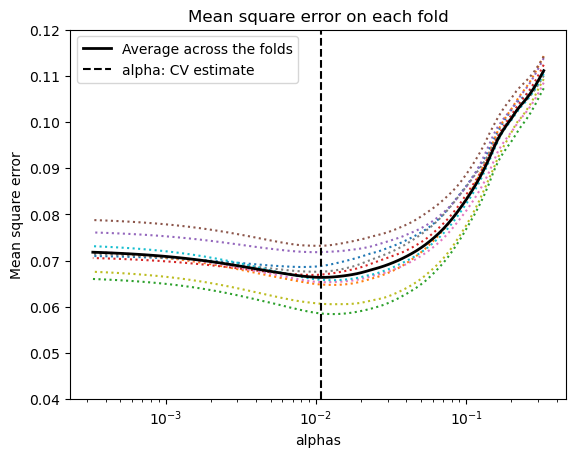

In [99]:
#Plotting the results of cross-validation with mean squared error
#Scale the x-axis with a log transformation
plt.semilogx(cv_lasso.alphas_, cv_lasso.mse_path_, ":")

#for each k-fold, plot the change in MSE with changing alpha and the average MSE
plt.plot(
    cv_lasso.alphas_ ,
    cv_lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)

#add a line to show where the error minimises (this is where alpha is selected)
plt.axvline(
    cv_lasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

#improve plot presentation
plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0.04, 0.12
plt.ylim(ymin, ymax)

plt.show()

To plot variations in different alphas, we can use a semilog plot when we use lasso regression with k-fold cross validation. During k-fold cross-validation, the dataset is divided into k subsets. The model is trained k times using a different fold as a validation set and the remaining as training sets. The mean squared error is calculated on the validation set for each alpha value tested. We access these values by `cv_lasso.mse_path_`, a 2D array where each row corresponds to specific alpha values and each column corresponds to the mean squared values for a particular fold.

We can access the alphas used for k-fold cross-validation by `cv_lasso.alphas_`. 

By invoking the `semilogx` method on the matplotlib library, we can create a semilogarithmic plot. The y-axis is scaled linearly, whereas the x-axis is scaled logarithmically. This allows us to span a large range of values of the alphas.

We use the `plot` method to plot the average mean squared error across all the folds on a semilog plot. Specifying the alphas and then using the `cv_lass.mse_path_.mean()` method to create the average MSE. We specify `axis=-1` as we want to use the last axis of the array. We want to access the mean squared values for each fold. The mean method will create an average for each row of `cv_lass.mse_path_` representing the MSE values for each specific alpha value across all the folds. We specify `"K"` to show a solid black line across the average we created with a label. 

The `avxline` method adds a vertical line to the plot. We pass in `cv_lass.alpha_` to indicate the estimated optimal alpha value determined by cross-validation. Specifying the line style as dashed lines by passing `--` into the `linestyle` parameter. The `color` parameter has the argument `k` which sets the line's color to block.

The rest of the code is about setting the axes. We use some matplotlib methods to modify the chart. The `legend` method will give us a legend of the two plots we created. We use the `xLabel` and `yLabel` methods to specify what we want to call the x and y-axis. We can specify the title by using the `title` method. We use the `axis` method and pass in `tight` as an argument, which means we want to adjust the axes to tightly fit the data being plotted by removing extra padding. 

We declare some variables to specify the max and min values of y and use the `ylim` method, passing these values in to specify what the y-axis should start from and end.

## Part 3: Random Forest

The Random Forest model is an ensemble method. An ensemble method combines multiple predictions of multiple individual models to make more accurate predictions than any one model.

The random forest creates many decision trees and combines them to make predictions. To expand on this, a decision tree is an algorithm that uses a tree-like flowchart to make decisions and predict outcomes based on input features. We can use the algorithm for both regression and classification tasks. 

The decision tree algorithm builds a tree-like model from the training data we supply. The tree model has internal nodes, branches and leaf nodes. Each node represents a test on a specific feature, and each branch represents the outcome of the test. The leaf nodes represent a class label or a predicted value.

An example might look like the one below.

                            (Root)
                           /      \
                 [Feature A > 5]   [Feature B <= 3]
                    /                     \
       (Leaf: Class 1)             [Feature C > 7]
                                       /            \
                              (Leaf: Class 0)    (Leaf: Class 1)

The root node is the starting point of the tree and represents the entire dataset. Each [] represents an internal node, a test or a condition on the specific feature. The branches from these internal nodes represent the possible outcomes, and we follow the branches down. For `[Feature A > 5]`, the leaf node below it represents the predicted class of 1.

To make predictions using decision trees, we start at the root node. The algorithm selects the best features and threshold values to split each internal node. The algorithm splits the data based on the features selected; the splitting continues until a stop criterion is set. After the stop criterion has been reached, the leaf nodes are created. The algorithm evaluates the conditions and makes predictions.

Decision tree algorithms are highly interpretable, can be visualized and handle both categorical and numerical data, and are robust to outliers and missing data. They are prone to overfitting, so we might use a random forest to address this by combining multiple decision trees to make more accurate predictions.

The random forest model creates classification And regression decision trees (CART) and averages the decision across each tree. They can be used for regression or classification problems. Each CART tree is trained separately on a random subset of the data. The averaging of these bootstrapped trees is called _'Bagging'_. In addition, each tree is trained on a subset of the available variables. Both of these methods reduce the over-fitting and improve the performance of Random Forest.

CARTs are individually optimised by minimising the 'impurity' at each data split. This impurity can be calculated in different ways, but often the most popular (and default) is by a method termed Gini Impurity. We will use this method.

To read more about Random Forests, you can read the original publication [here](https://link.springer.com/article/10.1023/a:1010933404324).

### **Step 1:** Import Relevant Functions and Define a Base Model

In [102]:
#Import required functions
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report

#Define the random forest model
rf = RandomForestClassifier(random_state=10) #random_state fixed for reproducibility of result

### **Step 2:** Define A Grid of Hyper-Parameters for Tuning and Build a Model Using k-fold Cross-Validation

Just like in LASSO, where we could optimise the value alpha in the model, Random Forest has a number of hyper-parameters that we can change to find the best-performing model. 

In this exercise, we will optimise (or 'tune') three of these hyper-parameters:
1. n_estimators
2. max_features
3. min_samples_leaf

**Q.** What do each of these parameters control?

<span style = 'Color:red'>Hint: if you're not sure, take a look at the sklearn information for the `RandomForestClassifier` [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).</span>

<details>
    <summary>Answer</summary>
    <ol>
    <li> n_estimators : the number of trees in the random forest
    <li> max_features : the number of variables each tree is trained within the random forest
    <li> min_samples_leaf : the minimum number of samples permitted after a split of the data in any tree
    </ol>

</details>

In [103]:
#Define the hyperparameters to be used in the grid search
param_grid = {
    'n_estimators': [25, 50, 100],  #no. of trees to build
    'max_features': ['sqrt', 'log2'], #no. of features randomly selected at each split
    'min_samples_leaf': [4, 10, 25], #minimum no. of samples at terminal nodes (leaf) - allows asymmetric splits whilst balancing overfitting
}

We specify a dictionary of different hyperparameters, the number of trees to build, the number of features to randomly select at each split and the minimum number of leaf nodes.


The number of trees to build increasing the number of trees can improve the performance of the random forest. 

Within a random forest, we can randomly select the number of features at each split of the decision trees within the random forest. It controls the randomness and diversity of the trees. We specify the square root of the total number of features considered at each split. For example, if there are 16 features at each split in the decision tree random forest will consider a random subset of 4 features. 

 The `log2` option specifies that the base two logarithms of the total number of features will be used. To conceptualise a log2, think of dividing the number of features by two until you get to one; the number of times dividing is what the base two logarithms of the number of features mean. So if a dataset has 16 features, dividing 16 by two over and over till you get to 1 result is four divides. Hence the base two logarithms of 16 is 4. Therefore at each split, the decision tree will consider a random subset of four features. By limiting the number of features at each split, the random forest reduces the correlation between trees and helps prevent overfitting.

The choice between `log2` and `sqrt` is by experimentation, and recommended to try both.

Specifying the minimum number of leaf nodes can regulate the trees' complexity and prevent overfitting. Here we use a small value to allow flexibility and more complex splits but with the danger of overfitting the data. On the other hand, a higher number promotes simpler trees and reduces overfitting.

Note:
- The general rule for the number of features selected at each split is listed below:
    - For classification: this is the sqrt (total no. features)
    - For regression: total no. features / 3

We can find the best hyperparameters by using a cross-validation approach with a grid search hyperparameter optimisation technique which will exhaustively search through all possible combinations of hyperparameters defined in the `param_grid`. 

Lets define the cross-validation approach using `RepeatedStratifiedKFold`

In [104]:
#Define the cross-validation approach: repeated stratified k fold 
#stratified represents the class imbalance of the data in the k splits 
#repeats cv several times and averages result - better performance measure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)

We define the number of folds by specifying the `n_splits` parameter number in this case 10. The number of repeats `n_repeats` represensts how often the cross validation proceess will be repeated using different random shuffling of data. The `random_state` provides reproducibility of randomness as described before.

We construct a grid search by  creating a `GridSearchCV` object stating the model type, parameters, cross-validation approach we created above and scoring metric 

In [106]:
#Bring together the model and cv method into the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, #the RF model
                           param_grid=param_grid, #the tuning grid we made
                           n_jobs=-1, #allows all cores to be used during model building
                           cv=cv, #the cross-validation method
                           scoring='accuracy') #what we want to optimise when selecting our hyper-parameters

Lets fit the grid search object to the training data.

Note - we need to revert our outcome y to a single column for random forest

<span style = 'color:red'>Hint: use the nested function [.values.ravel()] for the outcome variable to reduce a multidimension array to a 1D array. The algorithms used to create the model expects a 1D array -</span>

In [108]:
#Convert multilabel y variable back to 1d array due to package requirement
y_train_rf = pd.from_dummies(y_train)

y_train_rf.head()

,
0,claudinlow
1,Normal
2,LumB
3,LumB
4,LumB


In [109]:
#Fit the grid search hyperparameter model to our data - using ravel.() to flattened the y variable 
grid_search.fit(X_train, y_train_rf.values.ravel())

/Users/JJCaterson/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/JJCaterson/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/JJCaterson/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=10),
             estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [4, 10, 25],
                         'n_estimators': [25, 50, 100]},
             scoring='accuracy')

**Q.** The grid search object has now been fitted and validated. Note the warning message above '_UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10_.'

Why is this the case, and will it have a big impact on our model?

<details>
    <summary>Answer</summary>

    There is a chance that some of the cancer subtype classifications are not in some training sets and, thus, are not trained on these outcomes. This could worsen the performance of the model for these specific subtypes.
    
</details>

**Exercise 3.5** Output the best hyperparameters found through grid search and cross validation, and the mean cross-validated score of the best estimator.

Hint: Look at the documentation for [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [45]:
#Output the best hyperparameters and the mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 100}
Best score:  0.7236436937406595


### **Step 3:** Build the Optimised Random Forest Classifier and Assess Its Performance

**Exercise 3.6** Fit the tuned random forest classifier to the training data using the parameters above.

In [111]:
#Update the model with the best parameters found 
best_rf = RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 4, n_estimators = 100)

#Fit the model with the training data
best_rf.fit(X_train, y_train_rf.values.ravel())

RandomForestClassifier(min_samples_leaf=4)

Remember when we fit the model, we have to use a 1D array using the `ravel()` method on the y training data because it has multiple labels.

**Exercise 3.7** Use the tuned random forest classifier to make predictions on the test data 

In [113]:
#Get predictions and store them in a separate variable
y_pred_rf = best_rf.predict(X_test)
y_test_rf = pd.from_dummies(y_test)

**Exercise 3.8** Use `classification_report` to evaluate the performance metrics of the model.

Hint: Look at the documentation [here](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

In [116]:
#Output the predictive performance on the test data 
print(classification_report(y_pred_rf, y_test_rf,
                            zero_division = 0)) #sets value to zero if no data available

              precision    recall  f1-score   support

       Basal       0.85      0.76      0.80        62
        Her2       0.57      0.78      0.66        55
        LumA       0.87      0.72      0.79       269
        LumB       0.76      0.68      0.72       145
          NC       0.00      0.00      0.00         0
      Normal       0.21      0.75      0.33        12
  claudinlow       0.64      0.84      0.73        51

    accuracy                           0.73       594
   macro avg       0.56      0.65      0.58       594
weighted avg       0.78      0.73      0.75       594



**Q.** What do the metrics mean, and what are the advantages/disadvantages of using them to evaluate performance?

<details>
    <summary>Answer</summary>
    <p>Check out the sklearn documentation <a href='https://scikit-learn.org/stable/modules/model_evaluation.html'>here</a> to find out about each score and many more.</p> 
</details>

**Exercise 3.9** Create a simple confusion matrix to get a brief overview of the predictions made

Hint: Look at the documentation [here](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix)

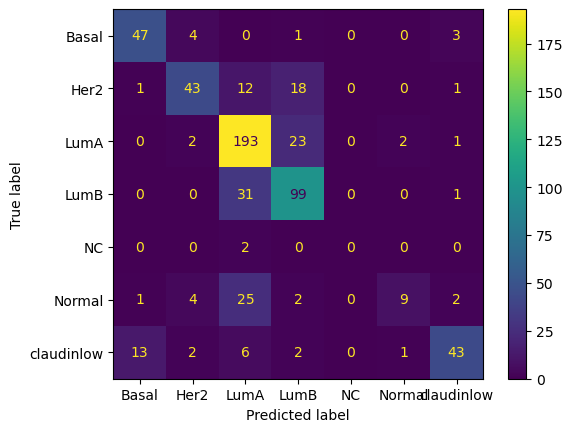

In [121]:
#Confusion matrix of the predictions and observed data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test_rf, y_pred_rf)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                                 display_labels = best_rf.classes_)

cm_plot.plot()
plt.show()

We use the `confusion_matrix` method passing in the test and prediction values of y. This will evaluate the classification accuracy by computing a comparison between the predicted label and the true label. THe higher the diagnoal value the better.

We use the `confusion_matrix_display` to visually represent the confusion matrix as shown above, passing in the return value of the `confusion_matrix` method and specifying the labels that should be displayed. We can get access to these labels via the `classes_` attribute of our random forest model.

### **Step 4:** Plot the most important features in the model - this tells us the genes that were most important in predicting breast cancer subtype 

Random Forest, like many more complex machine learning methods, is not easy to interpret. They are often termed 'black box models'. However, some simple methods exist to explain the most 'important' features in the model. One is feature importance, which can be calculated in multiple ways. 

We can do this by measuring something called gini impurity on the features used to split the data in our decision tree.

We take each feature in our model and calculate the gini impurity loss. This is essentially a sumation of probabilities that the data belongs to a certain class. The value is between 0 and 1, where 0 means all data belongs to the same class and 1 means that the classes are evenly distributed. We then take the average of these losses over all decision trees in the model to quantify how important the feature is to find the most important ones.

In decision tree algorithms we want to minimise the gini impurity as much as possible.

Below, we use feature importance by mean loss in gini impurity by feature to find the most important features in our model.

The code below defines a custom colour gradient function for the bar plot

Don't worry too much about understanding the code below. These functions can be used to convert colour values from hex to RGB and then to create a color gradient.

In [122]:
#Define colour gradient functions
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


**Exercise 3.10** Identify the 50 most important predictors used in the random forest model and sort them in descending order. 

In this example, gini impurity is used to measure variable importance.

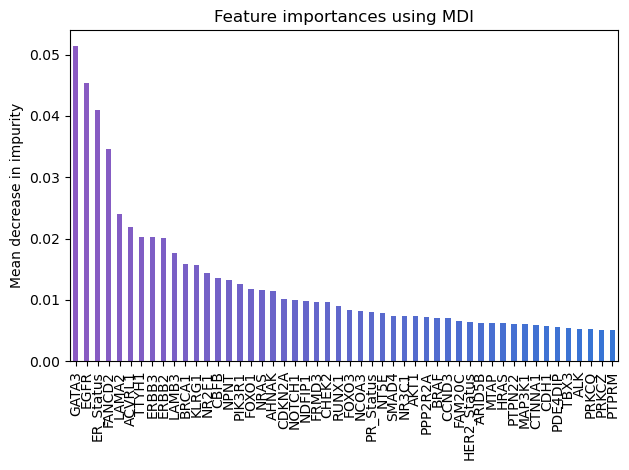

In [124]:
#Determine feature importance using mean decrease in gini impurity and plot the top 50 features

#get a list of the variable names
feature_names = X.columns.values.tolist() 

#create a data series of feature importances for each variable and sort them from most to least important
rf_features = pd.Series(best_rf.feature_importances_, index=feature_names)
rf_features.sort_values(ascending = False , inplace = True)

#select colour scheme for plot
color1 = "#8A5AC2"
color2 = "#3575D5"

#plot feature importance
fig, ax = plt.subplots()
rf_features[0:50].plot.bar(ax=ax, color= get_color_gradient(color1, color2, 50))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Part 4: XGBoost

XGBoost (eXtreme Gradient Boosting) is a different ensemble learning method that creates multiple learners and then combines weak learners to improve prediction accuracy (in a method known as boosting). The weak learners with poorer predictions are weighted more than better learners, so the model focuses on high-weighted predictions.

The hyper-parameters tuned in XGBoost can be broadly divided as follows:
1. Tree-specific parameters: as seen previously on the random forest
2. Boosting parameters: affects boosting of the model
3. Miscellaneous parameters: overall model operation

### **Step 1:** Import Relevant Functions

In [126]:
#Import relevant functions
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### **Step 2:** Build a Base Model

We initialise a base model without any hyperparameter tuning and fit it to the training data. We then evaluate the baseline predictive performance on test data. We can use this as a baseline from which to improve.

In [132]:
#Fit the xgboost model without tuning hyperparameters 
xgb = XGBClassifier(random_state=10)

xgb.fit(X_train, y_train) #fit the model to the training set

xgb_pred = xgb.predict(X_test) #make predictions on the test set

accuracy_score(y_test, xgb_pred) #this is the base predictive performance

0.5993265993265994

We introduce a `random_state` parameter for reproducibility sake like you've seen in previous models.

By using the `fit` and `predict` methods we can choose which data sets to fit and predict. 

The `accuracy_score` method returns the level of accuracy in the model we've created. Notice how we're using the y variable test data and our predicted values from our model. The accuracy score is calculated on these two data sets.

We can see the accuracy is 59.93%. We will tune the parameters of the model next and see whether this improves predictive performance.

### **Step 3:** Outline the hyper-parameters for the model

The hyperparameters that we will tune here include:
- ***`max_depth`***: maximum depth of a tree (controls over-fitting)
- ***`min_child_weight`***: used to control over/underfitting, sets a criterion that controls whether new leaves can be added
- ***`subsample`***: fraction of randomly selected observations for each tree
- ***`colsample_bytree`***: subsample ratio of columns when building each tree
- ***`learning_rate (ETA)`***: determines the impact each tree has on the final outcome; with xgboost there is an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
- ***`n_estimators`*** : number of sequential trees modeled

Note that this is not an exhaustive list of all the parameters that can be tuned.

Have a look at the documentation to get an understanding of some values we could use [here](https://xgboost.readthedocs.io/en/stable/parameter.html)

**Exercise 4.1** Set a list of parameters with appropriate ranges to be used for the model

In [133]:
#Set the parameters to be tuned
xgb_params = {"max_depth":[2, 6, 12],
              "min_child_weight":[0, 0.5, 1],
              "subsample" :[0.7,1],
              "colsample_bytree":[0.5, 0.75, 1],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[50,100]}

### **Step 4:** Use Grid Search and k-fold Cross-Validation to Tune the Model Parameters

**Exercise 4.2** Fit a new XGBoost model to use all cores with 100 different estimators

**Exercise 4.3** Use `GridSearchCV` to perform a grid search of hyperparameters

**Exercise 4.4** Fit the grid search model to the training data and output the best parameters

<span style = 'color:red'>Warning: This may take a while to run - but don't worry, this is normal</span>

In [136]:
#Fit a new model
xgb_new = XGBClassifier(n_jobs=-1,random_state=10)

#Initialise the gridsearch function and output its best parameters
xgb_gs = GridSearchCV(xgb_new, param_grid = xgb_params, cv=3, 
                     scoring = "accuracy")

#Fit the gridsearch model to training data
xgb_tuned = xgb_gs.fit(X_train,y_train, verbose=0)
print(xgb_gs.best_params_)

{'colsample_bytree': 0.75, 'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1}


### **Step 5:** Use the Tuned XGBoost Model to Make Predictions on Test Data

**Exercise 4.5** Use the tuned XGBoost model to predict the training data. What is the accuracy of the new model?

In [138]:
#Use the grid search model to predict on test data and output accuracy
xgb_tuned_pred = xgb_tuned.predict(X_test)
print('Accuracy:',accuracy_score(y_test, xgb_tuned_pred))

Accuracy: 0.601010101010101


### **Step 5:** Feature Importance

Like the random forest, XGBoost is not easy to interpret. Thus, we can also use feature importance here to get some idea of how the model works. Below, we use the mean information gained by each feature to compare feature importance. 

**Exercise 4.6** Plot the top 40 most important features in the model in a bar chart

Hint: `plot_importance` from xgboost can be used to illustrate this 

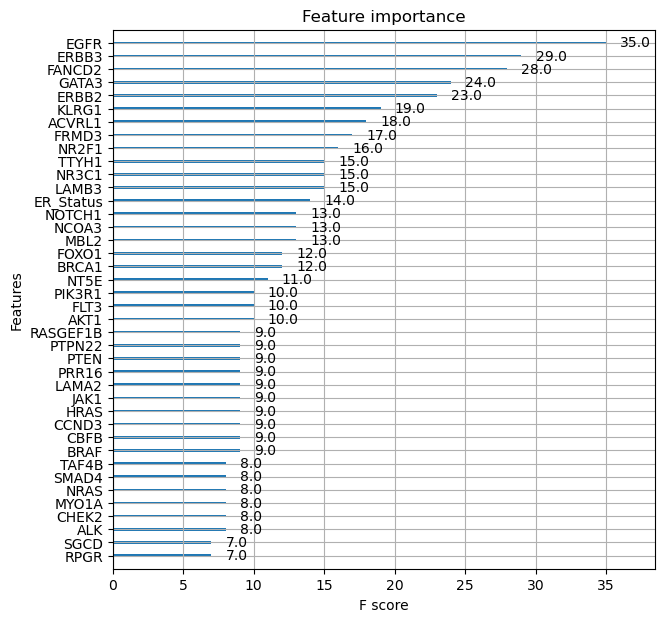

In [149]:
#Obtain feature importance from the xgboost model
from xgboost import plot_importance

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot()
plot_importance(xgb_tuned.best_estimator_, max_num_features=40,ax=ax)

plt.show()

**Q.** How does feature importance in the XGBoost model compare with LASSO and Random Forest?

## Next steps

Now that you've gone through the fundamentals of multi-class classification, you can try some of these additional exercises and challenges to stretch your understanding further.

**Exercise 2.5** Read up on one hot encoding and how categorical variables are handled in regression models

**Exercise 2.11** Read up on what metrics are commonly used to evaluate model performance and why this is different for regression vs. classification

**Exercise 3.9** Read up on gini impurity and how it is used in a random forest

**Exercise 4.3** Look into early stopping in XGBoost and why this might be used 

**Challenge** Use the 145 predictors selected from lasso regression to build a random forest and xgboost classifier. Compare the model performance using the selected predictors vs all the predictors - is there an improvement?

**Challenge** Construct ROC-AUC curves to compare the two classification models used 

Fill out the form below and we'll provide feedback on your code.

**Any feedback on the exercise? Any questions? Want feedback on your code? Please fill out the form [here](https://docs.google.com/forms/d/e/1FAIpQLSdoOjVom8YKf11LxJ_bWN40afFMsWcoJ-xOrKhMbfBzgxTS9A/viewform).**